In [2]:
import geopandas as gpd
import contextily as ctx
import plotly.express as px
import matplotlib.pyplot as plt

import matplotlib as mpl


## for data analysis
import pandas as pd


# for plotly themes
import plotly.io as pio

## for URL requests
import urllib.request
import requests

## for maps
import folium
from folium import plugins
mpl.rc('font',family='MS Gothic')


ファイルの読み込み

In [3]:
gdf = gpd.read_file('takamatsu.zip')

In [4]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6654 entries, 0 to 6653
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   KEY_CODE   6654 non-null   object  
 1   PREF       6654 non-null   object  
 2   CITY       6654 non-null   object  
 3   K_AREA     6654 non-null   object  
 4   S_AREA     6654 non-null   object  
 5   PREF_NAME  6654 non-null   object  
 6   CITY_NAME  6654 non-null   object  
 7   S_NAME     6654 non-null   object  
 8   KIGO_E     12 non-null     object  
 9   HCODE      6654 non-null   int64   
 10  AREA       6654 non-null   float64 
 11  PERIMETER  6654 non-null   float64 
 12  KIHON1     6654 non-null   object  
 13  DUMMY1     6654 non-null   object  
 14  KIHON2     6654 non-null   object  
 15  KIHON3     6654 non-null   object  
 16  C1         6654 non-null   int64   
 17  C2         6654 non-null   int64   
 18  DUMMY2     6654 non-null   object  
 19  C3         6654 non

In [5]:
gdf.head()

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
0,3720100011,37,201,064000060,00011,香川県,高松市,古新町,NaN,8101,...,2010001-1-00,87,65,37,201,134.046211,34.345890,0640-00060,1-1,"POLYGON ((134.04564 34.34609, 134.04683 34.345..."
1,3720100021,37,201,064000070,00021,香川県,高松市,古新町,NaN,8101,...,2010002-1-00,10,6,37,201,134.047577,34.345683,0640-00070,2-1,"POLYGON ((134.04777 34.34580, 134.04838 34.345..."
2,3720100031,37,201,065000010,00031,香川県,高松市,磨屋町,NaN,8101,...,2010003-1-00,58,51,37,201,134.046154,34.345598,0650-00010,3-1,"POLYGON ((134.04677 34.34565, 134.04672 34.345..."
3,372010004101,37,201,065000020,0004101,香川県,高松市,磨屋町,NaN,8101,...,2010004-1-01,5,3,37,201,134.047528,34.345392,0650-00020,4-1- 1,"POLYGON ((134.04833 34.34542, 134.04830 34.345..."
4,372010004102,37,201,065000030,0004102,香川県,高松市,磨屋町,NaN,8101,...,2010004-1-02,21,10,37,201,134.046099,34.345304,0650-00030,4-1- 2,"POLYGON ((134.04672 34.34537, 134.04667 34.345..."


In [6]:
gdf = gdf.dissolve(by='S_NAME',aggfunc='sum').reset_index()

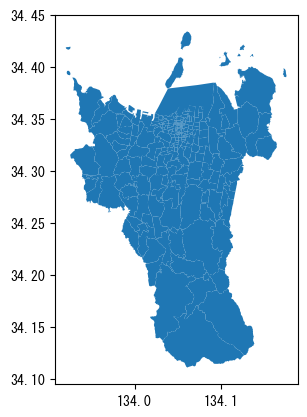

In [7]:
fig,ax = plt.subplots()
gdf.plot(ax=ax);

コロプレスマップを作る

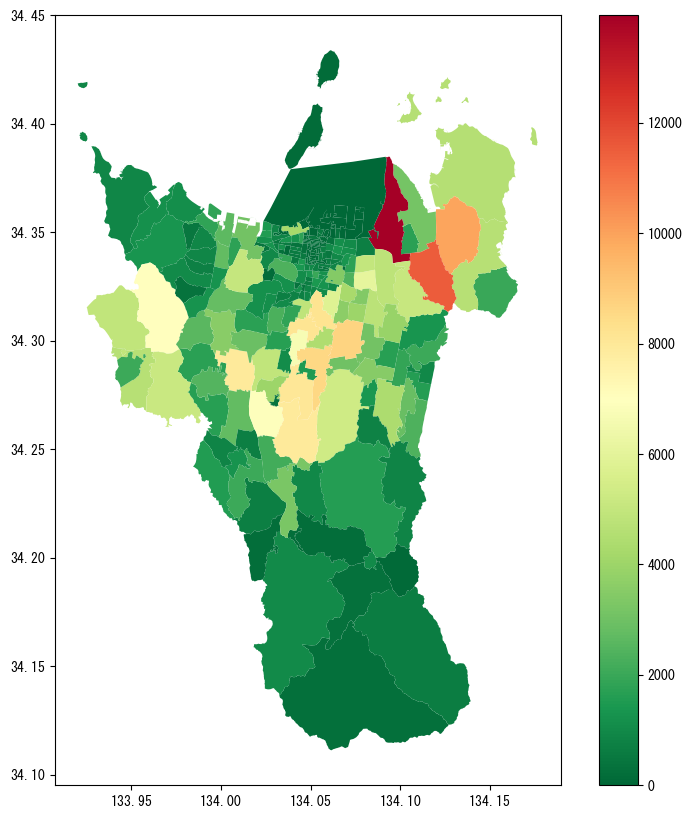

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='RdYlGn_r');

モジュール「contextily」をインポートする

In [9]:
import contextily as cx

地理座標系を3857に設定する

In [10]:
gdf=gdf.to_crs(3857)

人口マップを作る

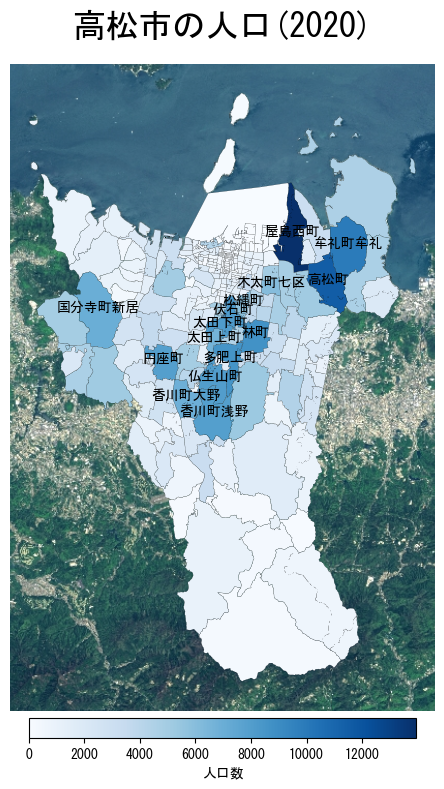

In [11]:
fig,ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Blues',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# Sort the dataframe by JINKO in descending order
gdf_sorted = gdf.sort_values('JINKO', ascending=False)

# Get the top 10 rows
top_15 = gdf_sorted.head(15)

# Label the polygons with the top 10 highest JINKO values
for idx, row in top_15.iterrows():
    ax.annotate(row['S_NAME'], (row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10, ha='center')

# title
ax.set_title('高松市の人口(2020)',fontsize=24, pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg');

世帯数マップを作る

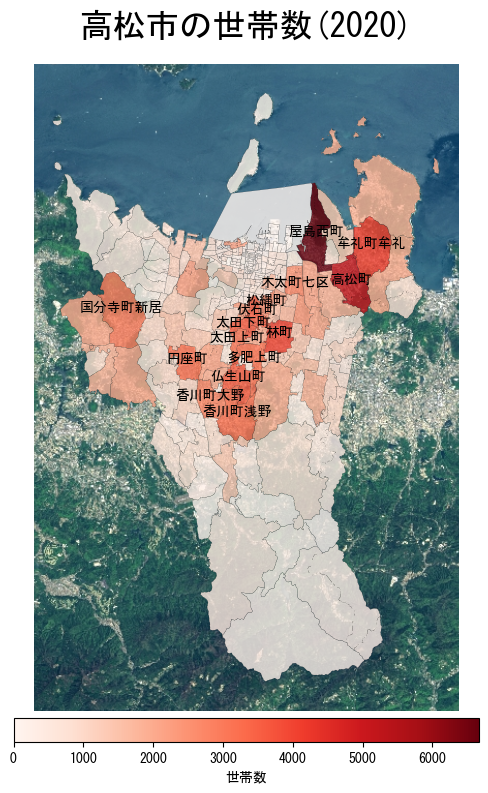

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='SETAI',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "世帯数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# Sort the dataframe by JINKO in descending order
gdf_sorted = gdf.sort_values('SETAI', ascending=False)

# Get the top 10 rows
top_15 = gdf_sorted.head(15)

# Label the polygons with the top 10 highest JINKO values
for idx, row in top_15.iterrows():
    ax.annotate(row['S_NAME'], (row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10, ha='center')

# title
ax.set_title('高松市の世帯数(2020)', fontsize=24,pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')

感想:トップ15までの人口数マップと世帯数マップを作った。人口と世帯の集中は少しも変わらないらしいです。人は高松駅周辺の区域に集中すると予想したが、一番人口と世帯が多いのは北西部にある屋島西町であり、二番目は隣にある高松町である。高松駅周辺の区域の面積が比較的に小さいのは一つの原因だと思う。もう1つの原因は、駅周辺に商業施設が多いけど地価が高くて住宅が少ないという可能性もある。